# Импортируемы библиотеки и функци 

In [1]:
import pandas as pd
from CoolProp.CoolProp import PropsSI 
import math as mt
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

def GDF_pi (p_k):
    return (0.06 * 10e5)/p_k

def Rho_OK (p, T):
    return PropsSI('D', 'P', p, 'T', T, 'O2')
def Rho_GOR (p, T):
    return PropsSI('D', 'P', p, 'T', T, 'CH4')
def p_NP_OK (T): 
    return PropsSI('P', 'T', T, 'Q', 1, 'O2')
def p_NP_GOR (T): 
    return PropsSI('P', 'T', T, 'Q', 1, 'CH4')
def C_p_OK (p, T):
    return PropsSI('CPMASS', 'P', p, 'T', T, 'O2')
def C_p_GOR (p, T):
    return PropsSI('CPMASS', 'P', p, 'T', T, 'CH4')

# Исходные данные 

In [2]:
P_DU = 360*10e2 # Тяг двигтельныой установки, Н
N_dv = 12 # Количество двигателей в ДУ
P_dv = P_DU / N_dv # Тяга одного двигателя на уровне моря, Н
p_a = 0.06 * 10e5 # Давления на срезе, Па
E_akkum = 400 * 3600 # Плотность энергии акумуляторов, В*c/кг
E_dv = 5200 # Удельная мощность электродвигателя, В/кг
kpd_priv = 0.82 # КПД привода насоса 
t_dv = 180 # Время работы двигателя, с
kpd_NO = 0.65
kpd_NG = 0.65
koef_poter_GL_KL = 6

# Дополнительны исходные данные 

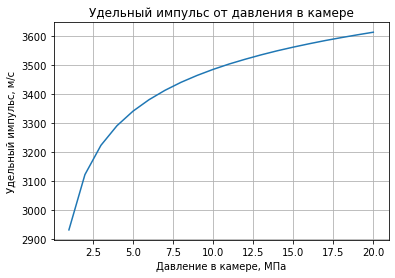

In [3]:
dop_dann = pd.read_excel('./dop_nach_dan.xlsx', )
p_k_sps = list(dop_dann['p_k']) # Давление в камере
I_ud_sps = list(dop_dann['I_ud']) # Удельный импульс 
betta_rasx_komp_sps = list(dop_dann['betta']) # Расходный комплекс 
K_m_opt_sps = list(dop_dann['Km_opt']) # Оптимальное соотношение КТ
k_adiab_sps = list(dop_dann['k']) # Коэф. адиабаты 
R_gaz_post_sps = list(dop_dann['R']) # Газовая постаянная 
T_k_sps = list(dop_dann['T_k']) # Температура в камере
n_politrop = 1.18 # Показатель политропы 
#ro_ok_sps = [] # Плотность окислителя 
#ro_gor_sps = [] # Плотность горючего 
#p_s_ok = [] # Давление насышенных паров окислителя 
#p_s_gor = [] # Давление насыщенных паров горючего 
#c_p_ok_sps = [] # Удельная изобарная теплоемкость окислителя 
#c_p_gor_sps = [] # Удельная изобраная теплоемкость горючего 
eps_pk_sps = [] # Степень расширения в сопле
m_KT_sps = [] # Расход топлива 
for i in range(len(p_k_sps)):
    #ro_ok_sps.append(PropsSI('D', 'P', p_k_sps[i], 'T', T_k_sps[i], 'O2'))
    #ro_gor_sps.append(PropsSI('D', 'P', p_k_sps[i], 'T', T_k_sps[i], 'CH4'))
    #p_s_ok.append(PropsSI('P', 'T', 80, 'Q', 1, 'O2'))
    #p_s_gor.append(PropsSI('P', 'T', T_k_sps[i], 'Q', 1, 'CH4')) 
    #c_p_ok_sps.append(PropsSI('CPMASS', 'P', p_k_sps[i], 'T', T_k_sps[i], 'O2'))
    #c_p_gor_sps.append(PropsSI('CPMASS', 'P', p_k_sps[i], 'T', T_k_sps[i], 'CH4'))
    eps_pk_sps.append(p_k_sps[i]/p_a)
    m_KT_sps.append(P_dv/I_ud_sps[i])

plt.plot(list(map(lambda x: x * 1e-6, p_k_sps)) ,I_ud_sps)
plt.ylabel('Удельный импульс, м/с')
plt.xlabel('Давление в камере, МПа')
plt.title('Удельный импульс от давления в камере')
plt.grid(True)

# Масса камеры

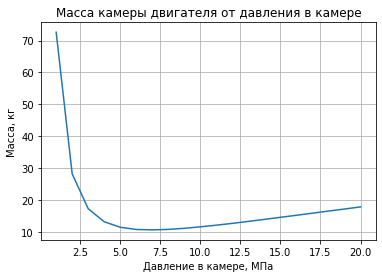

In [4]:
GDF_lambd_a_sps = [] # ГДФ лямбда на срезе сопла 
GDF_rasx_napr_sps = [] # ГДФ расходонапряженности 
Geom_step_rash_sps = [] # Геометрическая степень расширения 
fi_k = 0.98 # Коэф. потерь удельного импульса в камере 
fi_c = 0.97 # Коэф. потерь удельного импульса в сопле 
F_k_otn = 4
n_politrop = 1.18 # Показатель политропы расширения 
L_priv = 1 # Приведенная длинна камеры?
betta_a_vix_sopl = 6 * mt.pi / 180
fi_I = fi_c * fi_k # Коэф. потерь удельного импульса полный
F_kr_sps = [] # Площадь критического сечения 
d_kr_sps = [] # Диаметр критического сечения
F_k_sps = [] # Площадь камеры 
d_k_sps = [] # Диаметр камеры
F_a_sps = [] # Площадь среза 
d_a_sps = [] # Площадь среза
rasx_napr_otn_sps = [] # Относительная расходонапряженность 
ud_mass_kam = [] # Удельная масса камеры
ud_mass_sopl = [] # Удельная масса сопла 
S_cil_otn = [] # Относительная поверхность цилиндрической части камеры 
S_suj_ch_sopl = [] # Относительная поверхность сужающейся части камеры
Ras_sopl_otn = [] # геометрическая степень расширения сопла 
S_0_rchs = [] 
z_kaef_for_rchs = []
f_kaef_for_rchs = []
S_rassh_sopl = [] # Относительная поверхность расширяющейся части сопла 
Mass_kamera = [] # Масса камеры 

for i in range(len(p_k_sps)):
    GDF_lambd_a_sps.append( ( ( 1 - ( ( GDF_pi(p_k_sps[i]) 
                                      )** ( 1 / ( ( k_adiab_sps[i] / ( k_adiab_sps[i]-1 
                                                                                      ) ) ) ) )
                     )*((k_adiab_sps[i]+1)/(k_adiab_sps[i]-1)))**0.5)
    GDF_rasx_napr_sps.append(GDF_lambd_a_sps[i] * (1 - (((k_adiab_sps[i]-1)/(k_adiab_sps[i]+1)
                      )*(GDF_lambd_a_sps[i]**2)))**(1/(k_adiab_sps[i]-1)
                          ) * (((k_adiab_sps[i]+1)/2
                               )** (1/(k_adiab_sps[i]-1))))
    Geom_step_rash_sps.append(1/GDF_rasx_napr_sps[i])
    F_kr_sps.append( m_KT_sps[i] * betta_rasx_komp_sps[i] / p_k_sps[i])
    d_kr_sps.append(mt.sqrt(4 * F_kr_sps[i]/mt.pi))
    F_k_sps.append(F_k_otn * F_kr_sps[i])
    d_k_sps.append(mt.sqrt(4 * F_k_sps[i]/mt.pi))
    F_a_sps.append(F_kr_sps[i]/GDF_rasx_napr_sps[i])
    d_a_sps.append(mt.sqrt(4 * F_a_sps[i]/mt.pi))
    rasx_napr_otn_sps.append(4 * m_KT_sps[i]/(mt.pi*p_k_sps[i] * (d_k_sps[i]**2)))
    ud_mass_kam.append((3.03 * p_k_sps[i] * 1e-6/ (mt.sqrt(d_kr_sps[i]))) - 17) 
    ud_mass_sopl.append( (5.894 * 1e-2 * ((p_k_sps[i]/mt.sqrt(eps_pk_sps[i] * d_kr_sps[i])
                                          ) ** 0.475) ) - 23.58)
    S_cil_otn.append( ((3.544 * L_priv * mt.sqrt(p_k_sps[i] * rasx_napr_otn_sps[i]/m_KT_sps[i])
                       ) - (2 / mt.sqrt(rasx_napr_otn_sps[i] * betta_rasx_komp_sps[i])
                           ) + (mt.sqrt(rasx_napr_otn_sps[i] * betta_rasx_komp_sps[i])) + 1 ) )
    S_suj_ch_sopl.append((2/(rasx_napr_otn_sps[i] * betta_rasx_komp_sps[i])
                         ) + (0.818 / mt.sqrt(rasx_napr_otn_sps[i] * betta_rasx_komp_sps[i])) - (0.974))
    Ras_sopl_otn.append(d_a_sps[i]/d_kr_sps[i])
    S_0_rchs.append( ((32- (10*n_politrop)) * (Ras_sopl_otn[i]-1)
                     ) + ((2.1 + (1.6*mt.pow(n_politrop, 4))) * (mt.pow(Ras_sopl_otn[i]-1, 2.25))) )
    z_kaef_for_rchs.append(1 - mt.pow(mt.sin(betta_a_vix_sopl
                                        ) / (0.6 - (((0.018*n_politrop) - 0.0175
                                                    )*(Ras_sopl_otn[i] + 24))) , 4/3))
    f_kaef_for_rchs.append(1 - mt.exp(-mt.pow(1 - z_kaef_for_rchs[i],1/3)))
    S_rassh_sopl.append( S_0_rchs[i] * (1 - ((1.415 - (
        0.274/mt.pow(Ras_sopl_otn[i] ,0.5))) * f_kaef_for_rchs[i]) ) )
    Mass_kamera.append(F_kr_sps[i] * ((ud_mass_kam[i] * (S_cil_otn[i] + S_suj_ch_sopl[i])
                                    ) + (ud_mass_sopl[i]*S_rassh_sopl[i]
                        ) + (1.63 * 1e6 / mt.pow(p_k_sps[i] * m_KT_sps[i] * betta_rasx_komp_sps[i], 0.25)
                                            ) - (8.5/F_kr_sps[i]) )) 
plt.plot(list(map(lambda x: x * 1e-6, p_k_sps)) ,Mass_kamera)
plt.ylabel('Масса, кг')
plt.xlabel('Давление в камере, МПа')
plt.title('Масса камеры двигателя от давления в камере')
plt.grid(True)


# Масса электронасосного агрегата окислителя 

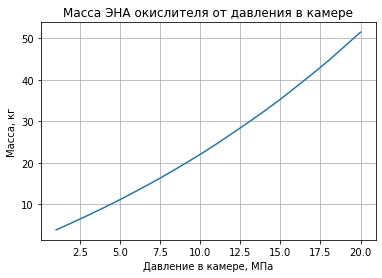

In [5]:
T_vx_ok = 90 # Температура окислителя на входе в насос, К
C_srv_max_ok = 3500 # Срывной коэфициент бастроходности 
p_vx_OK = 0.2 * 1e6 # Давление на входе в насос окислителя 
delt_p_f = 1e6 # Перепад давления на форсунках 
c_vx = 5 # Скорость течения жидкости до насосов 
c_vix = 10 # Скорость течения жидкости после насосов 
M_kontroller_OK = 0.5 # Масса контролера эл дв для привода окислителя 
delt_h_T_OK = 11.2 #  термодинамическая поправка на изменение свойств жидкости при наличии
# кавитации в насосе, Дж/кг.
delt_h_rez_OK = 10 # резерв по давлению на несовершенство расчёта, несоответствие
# свойств реальной жидкости заданным в справочниках, отличие кавитационной
# характеристики реального насоса от рассчитанного, Дж/кг

V_rasx_OK = [] # Объемный расход окислителя
m_OK = [] # Расход окислителя 
w_N_OK = [] # частота вращенияя ротора насоса окислителя
delt_p_mag_podv_OK = [] # Гидравлическое сопративление магистралей и арматуры
delt_p_mag_dv_OK = [] # Потери давлениея от выхода из насоса до двигателя 
p_vix_N_OK = [] # Давлеение на выходе из насоса окислителя
H_OK = [] # Потребный напор насоса окислителя, м^2/с^2
n_s_ok = [] # Коэффициент быстроходности насоса окилителя
KPD_N_OK = [] # КПД насоса окислителя 
T_vix_OK = [] # Температура окислителя на выходе 
M_N_OK = [] # Масса насоса оислителя
N_N_OK = [] # Мощность насоса окислителя 
N_polez_EDV_OK = [] # Полезная мощность электродвигателя (Мощность на валу)
N_potreb_OK = [] # Потребляемая мощность электродвигателем 
M_edv_N_OK = [] # Масса электродвигателя 
M_akkum_N_OK = [] # Масса акумулятора насоса окислителя 
Mass_ENAO = [] # Полная масса электронасоссного агрегата окислителя

delt_p_GL_KL_OK = koef_poter_GL_KL * Rho_OK(p_vx_OK, T_vx_ok
                        ) * mt.pow(c_vix,2) / 2 # Потери давленияя на главном клапане окислителя 
delt_h_srv_dop_OK = ((p_vx_OK - p_NP_OK(T_vx_ok)) / Rho_OK(p_vx_OK, T_vx_ok)
                           ) - delt_h_rez_OK - delt_h_T_OK  # Допустимы кавитационный запас м^2 / с^2

for i in range(len(p_k_sps)):
    m_OK.append(m_KT_sps[i] * K_m_opt_sps[i] / (1 + K_m_opt_sps[i]))
    V_rasx_OK.append(m_OK[i] / Rho_OK(p_vx_OK, T_vx_ok))
    w_N_OK.append(C_srv_max_ok * mt.pow(delt_h_srv_dop_OK, 3/4) / (298 * mt.pow(V_rasx_OK[i], 0.5)))
    delt_p_mag_podv_OK.append(0.05*p_k_sps[i])
    delt_p_mag_dv_OK.append(delt_p_f+ delt_p_mag_podv_OK[i])
    p_vix_N_OK.append(p_k_sps[i] + delt_p_mag_dv_OK[i])
    H_OK.append((p_vix_N_OK[i] - p_vx_OK) / Rho_OK(p_vx_OK, T_vx_ok))
    n_s_ok.append(193.3 * w_N_OK[i] * mt.pow(V_rasx_OK[i], 0.5) / mt.pow(H_OK[i], 3/4))
    KPD_N_OK.append( (0.82 - (0.005 * mt.pow(n_s_ok[i], 0.5))) / (1 + (500/mt.pow(n_s_ok[i], 2))) )
    T_vix_OK.append(T_vx_ok + (((1 - KPD_N_OK[i]) / KPD_N_OK[i]
                               ) * (H_OK[i]/ C_p_OK(p_k_sps[i], T_vx_ok) ) ) )
    M_N_OK.append(0.08*1e-4*Rho_OK(p_vx_OK, T_vx_ok)*mt.pow(H_OK[i],3/2) / w_N_OK[i] )
    N_N_OK.append(H_OK[i] * m_OK[i] / KPD_N_OK[i])
    N_polez_EDV_OK.append(H_OK[i] * m_OK[i] / KPD_N_OK[i])
    N_potreb_OK.append(N_polez_EDV_OK[i]/kpd_priv)
    M_edv_N_OK.append(N_polez_EDV_OK[i] / E_dv)
    M_akkum_N_OK.append(N_potreb_OK[i] * t_dv / E_akkum)
    Mass_ENAO.append(M_kontroller_OK + M_edv_N_OK[i] + M_N_OK[i])

plt.plot(list(map(lambda x: x * 1e-6, p_k_sps)) ,Mass_ENAO)
plt.ylabel('Масса, кг')
plt.xlabel('Давление в камере, МПа')
plt.title('Масса ЭНА окислителя от давления в камере')
plt.grid(True)

# Масса электронасосного агрегата горючего

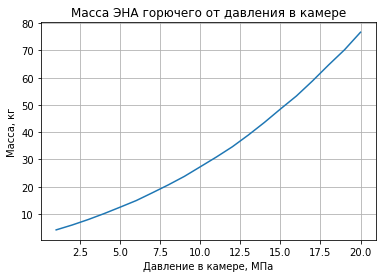

In [6]:
T_vx_GOR = 111 # Температура окислителя на входе в насос, К
C_srv_max_GOR = 3500 # Срывной коэфициент бастроходности 
p_vx_GOR = 0.15 * 1e6 # Давление на входе в насос окислителя 
delt_p_f = 1e6 # Перепад давления на форсунках 
c_vx = 5 # Скорость течения жидкости до насосов 
c_vix = 10 # Скорость течения жидкости после насосов 
M_kontroller_GOR = 0.5 # Масса контролера эл дв для привода окислителя 
delt_h_T_GOR = 15 #  термодинамическая поправка на изменение свойств жидкости при наличии
# кавитации в насосе, Дж/кг.
delt_h_rez_GOR = 10 # резерв по давлению на несовершенство расчёта, несоответствие
# свойств реальной жидкости заданным в справочниках, отличие кавитационной
# характеристики реального насоса от рассчитанного, Дж/кг

V_rasx_GOR = [] # Объемный расход окислителя
m_GOR = [] # Расход окислителя 
w_N_GOR = [] # частота вращенияя ротора насоса окислителя
delt_p_mag_podv_GOR = [] # Гидравлическое сопративление магистралей и арматуры
delt_p_mag_dv_GOR = [] # Потери давлениея от выхода из насоса до двигателя 
delt_p_oxl_GOR = [] #Потери в тракте охдаждения 
p_vix_N_GOR = [] # Давлеение на выходе из насоса окислителя
H_GOR = [] # Потребный напор насоса окислителя, м^2/с^2
n_s_GOR = [] # Коэффициент быстроходности насоса окилителя
KPD_N_GOR = [] # КПД насоса окислителя 
T_vix_GOR = [] # Температура окислителя на выходе 
M_N_GOR = [] # Масса насоса оислителя
N_N_GOR = [] # Мощность насоса окислителя 
N_polez_EDV_GOR = [] # Полезная мощность электродвигателя (Мощность на валу)
N_potreb_GOR = [] # Потребляемая мощность электродвигателем 
M_edv_N_GOR = [] # Масса электродвигателя 
M_akkum_N_GOR = [] # Масса акумулятора насоса окислителя 
Mass_ENAG = [] # Полная масса электронасоссного агрегата окислителя

delt_p_GL_KL_GOR = koef_poter_GL_KL * Rho_GOR(p_vx_GOR, T_vx_GOR
                        ) * mt.pow(c_vix,2) / 2 # Потери давленияя на главном клапане окислителя 
delt_h_srv_dop_GOR = ((p_vx_GOR - p_NP_GOR(T_vx_GOR)) / Rho_GOR(p_vx_GOR, T_vx_GOR)
                           ) - delt_h_rez_GOR - delt_h_T_GOR  # Допустимы кавитационный запас м^2 / с^2

for i in range(len(p_k_sps)):
    m_GOR.append(m_KT_sps[i] / (1 + K_m_opt_sps[i]))
    V_rasx_GOR.append(m_GOR[i] / Rho_GOR(p_vx_GOR, T_vx_GOR))
    w_N_GOR.append(C_srv_max_GOR * mt.pow(delt_h_srv_dop_GOR, 3/4) / (298 * mt.pow(V_rasx_GOR[i], 0.5)))
    delt_p_mag_podv_GOR.append(0.05*p_k_sps[i])
    delt_p_oxl_GOR.append(0.25*p_k_sps[i])
    delt_p_mag_dv_GOR.append(delt_p_f + delt_p_oxl_GOR[i] + delt_p_mag_podv_GOR[i])
    p_vix_N_GOR.append(p_k_sps[i] + delt_p_mag_dv_GOR[i])
    H_GOR.append((p_vix_N_GOR[i] - p_vx_GOR) / Rho_GOR(p_vx_GOR, T_vx_GOR))
    n_s_GOR.append(193.3 * w_N_GOR[i] * mt.pow(V_rasx_GOR[i], 0.5) / mt.pow(H_GOR[i], 3/4))
    KPD_N_GOR.append( (0.82 - (0.005 * mt.pow(n_s_GOR[i], 0.5))) / (1 + (500/mt.pow(n_s_GOR[i], 2))) )
    T_vix_GOR.append(T_vx_GOR + (((1 - KPD_N_GOR[i]) / KPD_N_GOR[i]
                               ) * (H_GOR[i]/ C_p_GOR(p_k_sps[i], T_vx_GOR) ) ) )
    M_N_GOR.append(0.07*1e-4*Rho_GOR(p_vx_GOR, T_vx_GOR)*mt.pow(H_GOR[i],3/2) / w_N_GOR[i] )
    N_N_GOR.append(H_GOR[i] * m_GOR[i] / KPD_N_GOR[i])
    N_polez_EDV_GOR.append(H_GOR[i] * m_GOR[i] / KPD_N_GOR[i])
    N_potreb_GOR.append(N_polez_EDV_GOR[i]/kpd_priv)
    M_edv_N_GOR.append(N_polez_EDV_GOR[i] / E_dv)
    M_akkum_N_GOR.append(N_potreb_GOR[i] * t_dv / E_akkum)
    Mass_ENAG.append(M_kontroller_GOR + M_edv_N_GOR[i] + M_N_GOR[i])

plt.plot(list(map(lambda x: x * 1e-6, p_k_sps)) ,Mass_ENAG)
plt.ylabel('Масса, кг')
plt.xlabel('Давление в камере, МПа')
plt.title('Масса ЭНА горючего от давления в камере')
plt.grid(True)

# Масса прочих элементов 

In [7]:
Mass_p_e = (0.217*P_dv/1e3) + 57.5 # Масса агрегатов автоматики,
# трубопроводов, масса рамы, масса деталей общей сборке 

# Масса одного двигателя 

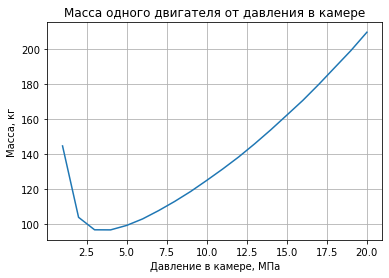

In [8]:
Mass_DV = []

for i in range(len(p_k_sps)):
    Mass_DV.append(Mass_kamera[i] + Mass_ENAO[i] + Mass_ENAG[i] + Mass_p_e)

plt.plot(list(map(lambda x: x * 1e-6, p_k_sps)) ,Mass_DV)
plt.ylabel('Масса, кг')
plt.xlabel('Давление в камере, МПа')
plt.title('Масса одного двигателя от давления в камере')
plt.grid(True)

# Масса рабочего запаса топлива 

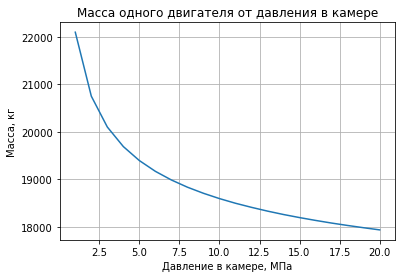

In [9]:
Mass_RZT = []
for i in range(len(p_k_sps)):
    Mass_RZT.append(N_dv * m_KT_sps[i] * t_dv)

plt.plot(list(map(lambda x: x * 1e-6, p_k_sps)) ,Mass_RZT)
plt.ylabel('Масса, кг')
plt.xlabel('Давление в камере, МПа')
plt.title('Масса одного двигателя от давления в камере')
plt.grid(True)

# Масса акумуляторов 

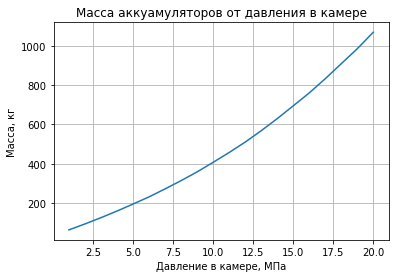

In [10]:
Mass_Akum = []

for i in range(len(p_k_sps)):
    Mass_Akum.append(N_dv * (M_akkum_N_OK[i] + M_akkum_N_GOR[i]))

plt.plot(list(map(lambda x: x * 1e-6, p_k_sps)) ,Mass_Akum)
plt.ylabel('Масса, кг')
plt.xlabel('Давление в камере, МПа')
plt.title('Масса аккуамуляторов от давления в камере')
plt.grid(True)

# Масса газобалонной системы наддува 


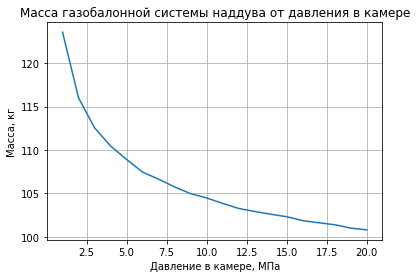

In [11]:
p_b_OK = 0.3* 1e6 # Давление наддува бака окислителя 
betta_bak = 1.06 # Коэффициент объема бака
M_RZ_OK = [] # Рабочий запас окислителя 
M_gar_OK = [] # Гарантийный запас окислителя 
M_n_ost_i_isp_OK = [] # Невырабатываемые остатки топлива и испарения в полете
Mass_zapr_OK = [] # Масса заправлемого окислителя 
V_ok_v_bak = [] # Объем окислителя в баке 
V_bak_OK = [] # Объем бака окислителя 
M_nadduv_ok = [] # Масса газобалонноц системы подачи окислителя 

p_b_GOR = 0.3* 1e6 # Давление наддува бака окислителя 
M_RZ_GOR = [] # Рабочий запас окислителя 
M_gar_GOR = [] # Гарантийный запас окислителя 
M_n_ost_i_isp_GOR = [] # Невырабатываемые остатки топлива и испарения в полете
Mass_zapr_GOR = [] # Масса заправлемого окислителя 
V_gor_v_bak = [] # Объем окислителя в баке 
V_bak_GOR = [] # Объем бака окислителя 
M_nadduv_gor = [] # Масса газобалонноц системы подачи окислителя 

Mass_nadduv = [] # Масса газоболонной системы гор и ок

for i in range(len(p_k_sps)): 
    M_RZ_OK.append(Mass_RZT[i] * K_m_opt_sps[i] / (K_m_opt_sps[i] + 1))
    M_gar_OK.append(0.02 * M_RZ_OK[i])
    M_n_ost_i_isp_OK.append(0.03  * M_RZ_OK[i])
    Mass_zapr_OK.append(M_RZ_OK[i] + M_gar_OK[i] + M_n_ost_i_isp_OK[i])
    V_ok_v_bak.append(Mass_zapr_OK[i] / Rho_OK(p_b_OK, T_vx_ok))
    V_bak_OK.append(betta_bak * V_ok_v_bak[i])
    M_nadduv_ok.append(11 + 1.1e-5 * p_b_OK * V_bak_OK[i])
    
    M_RZ_GOR.append(Mass_RZT[i] / (K_m_opt_sps[i] + 1))
    M_gar_GOR.append(0.02 * M_RZ_GOR[i])
    M_n_ost_i_isp_GOR.append(0.03  * M_RZ_GOR[i])
    Mass_zapr_GOR.append(M_RZ_GOR[i] + M_gar_GOR[i] + M_n_ost_i_isp_GOR[i])
    V_gor_v_bak.append(Mass_zapr_GOR[i] / Rho_GOR(p_b_GOR, T_vx_GOR))
    V_bak_GOR.append(betta_bak * V_gor_v_bak[i])
    M_nadduv_gor.append(11 + 1.1e-5 * p_b_GOR * V_bak_GOR[i])
    Mass_nadduv.append(M_nadduv_ok[i] + M_nadduv_gor[i])
    
plt.plot(list(map(lambda x: x * 1e-6, p_k_sps)) ,Mass_nadduv)
plt.ylabel('Масса, кг')
plt.xlabel('Давление в камере, МПа')
plt.title('Масса газобалонной системы наддува от давления в камере')
plt.grid(True)

# Масса топливного отсека

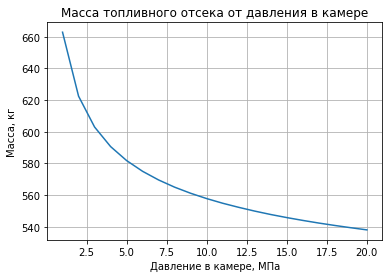

In [12]:
k_TO = 0.03 # Коэффициент массы топливного отсека
Mass_TO = [] # Масса топливного отсека 

for i in range(len(p_k_sps)):
    Mass_TO.append(k_TO * Mass_RZT[i])
    
plt.plot(list(map(lambda x: x * 1e-6, p_k_sps)) ,Mass_TO)
plt.ylabel('Масса, кг')
plt.xlabel('Давление в камере, МПа')
plt.title('Масса топливного отсека от давления в камере')
plt.grid(True)

# Масса двигательной установки 

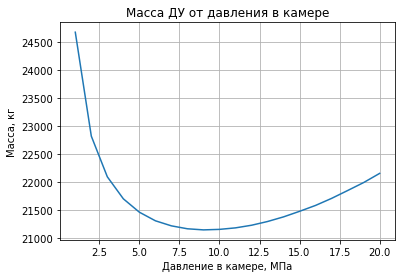

In [13]:
MASS_DU = []

for i in range(len(p_k_sps)):
    MASS_DU.append((12 * (Mass_DV[i] + (Mass_Akum[i]/N_dv))) + Mass_RZT[i] + Mass_TO[i] + Mass_nadduv[i])

plt.plot(list(map(lambda x: x * 1e-6, p_k_sps)) ,MASS_DU)
plt.ylabel('Масса, кг')
plt.xlabel('Давление в камере, МПа')
plt.title('Масса ДУ от давления в камере')
plt.grid(True)

# Оптимизация 

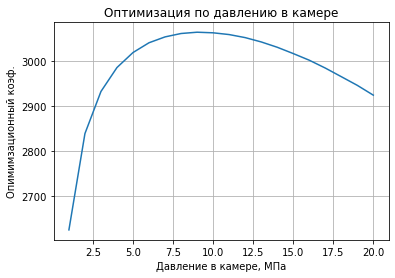

In [14]:
F_opt = [] # Оптимизационный параметр 

for i in range(len(p_k_sps)):
    F_opt.append(I_ud_sps[i] * Mass_RZT[i] / MASS_DU[i]) 
    #print(F_opt[i], i)
plt.plot(list(map(lambda x: x * 1e-6, p_k_sps)) ,F_opt)
plt.ylabel('Опимимзационный коэф.')
plt.xlabel('Давление в камере, МПа')
plt.title('Оптимизация по давлению в камере')
plt.grid(True) 

OPT_IND = F_opt.index(max(F_opt))


# Результаты расчета 

Максимальное значение оптимизационного параметра $F_{опт}$ = {{ round(F_opt[OPT_IND]) }}

Отсюда оптимальное давление в камере $p_{к}$ = {{ p_k_sps[OPT_IND] * 1e-6 }} МПа

Тяга ДУ $P_{дв}$ = {{ P_dv * 1e-3 }} кН 

Расход двигателя $\dot{m}$ = {{ round(m_KT_sps[OPT_IND], 3) }} $\frac{кг}{c}$

Стехиометрическое соотношение $ K_m$ = {{ K_m_opt_sps[OPT_IND] }}

Коэффициент аддиабаты $k_K$ = {{ k_adiab_sps[OPT_IND] }}

Универсальная газовая постоянная $ R_K $ = {{ round(R_gaz_post_sps[OPT_IND], 3) }} $\frac{Дж}{моль \cdot К}$

Температура в камере $T_K$ = {{ T_k_sps[OPT_IND] }} К

Расходный комплекс $\beta$ = {{ betta_rasx_komp_sps[OPT_IND] }} 

Масс двигательной установки $ M_{ДУ} $ = {{ round(MASS_DU[OPT_IND]) }} кг